In [4]:
total_length = 2
sequence = 'asal'
sequence = sequence + 'K' * (total_length - len(sequence))
print(sequence)

asal


In [18]:
import numpy as np
import torch

csv_path = r'/Data4/gly_wkdir/coldgenepredict/raw_sec/S_italica/分好的数据集csv/'

# 定义Dataset类
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file):
        self.total_length = 20
        self.data = self.get_sequence_lable(csv_file)
        
    def __getitem__(self, key):
        return self.data[key]
    
    def __len__(self):
        return len(self.data)

    def get_sequence_lable(self, csv_file)->list:
        with open(csv_file, 'r') as f:
            out = []
            for line in f:
                tmp = []
                seq = self.encode_sequence(line.strip().split(',')[1])
                tmp.append(seq)
                tmp.append(int(line.strip().split(',')[2]))
                out.append(tmp)
            return out

    # 定义一个函数，用于将序列转换为one-hot编码
    def encode_sequence(self, sequence:str)->torch.Tensor:
        # 把sequence: AGCT...用K填充到46398这么长
        # sequence = sequence + 'K' * (self.total_length - len(sequence))
        encoding = torch.tensor([
            [1, 0, 0, 0, 0] if base == 'A' else
            [0, 1, 0, 0, 0] if base == 'G' else
            [0, 0, 1, 0, 0] if base == 'C' else
            [0, 0, 0, 1, 0] if base == 'T' else
            [0, 0, 0, 0, 1] if base == 'N' else
            [0, 0, 0, 0, 0] for base in sequence
        ],dtype=torch.float32)
        # 把encoding用[0, 0, 0, 0, 0]填充到46398这么长
        encoding = torch.cat([encoding, torch.zeros(self.total_length - len(encoding), 5, dtype=torch.float32)])
        return encoding
        
from torch.utils.data import DataLoader
# 读取zero_rows_val.csv
data = MyDataset(csv_path + 'test.csv')
# print(data[0])
# 创建DataLoader
dataloader = DataLoader(data, batch_size=4, shuffle=False)


In [19]:
for i in (dataloader):
    # print(i[0])
    print(i[0].shape)
    # print(i[1])
    print(i[1].shape)
    
    

torch.Size([4, 20, 5])
torch.Size([4])
torch.Size([4, 20, 5])
torch.Size([4])
torch.Size([4, 20, 5])
torch.Size([4])
torch.Size([4, 20, 5])
torch.Size([4])
torch.Size([2, 20, 5])
torch.Size([2])


In [15]:
for i in  enumerate(dataloader):
    # print(i)
    print(i[0])
    print(i[1][0].shape)
    print(i[1][1])
    break

0
torch.Size([3, 20, 5])
tensor([0, 1, 0])


In [1]:
import pandas as pd

# 读取两个CSV文件
df1 = pd.read_csv('/Data4/gly_wkdir/coldgenepredict/raw_sec/S_italica/分好的数据集csv/one_rows_val_app.csv', header=None)
df2 = pd.read_csv('/Data4/gly_wkdir/coldgenepredict/raw_sec/S_italica/分好的数据集csv/zero_rows_val.csv', header=None)

# 使用zip函数将两个数据框的行逐行交叉合并
merged_rows = []
for row_a, row_b in zip(df1.values, df2.values):
    merged_rows.append(row_a)
    merged_rows.append(row_b)

# 创建新的DataFrame
merged_df = pd.DataFrame(merged_rows, columns=df1.columns)

# 将合并后的结果保存为新的CSV文件
merged_df.to_csv('/Data4/gly_wkdir/coldgenepredict/raw_sec/S_italica/分好的数据集csv/val.csv', index=False, header=False)


In [7]:
# 给一个二进制数据集路径
import pickle
train_data_dir = '/Data4/gly_wkdir/coldgenepredict/raw_sec/S_italica/分好的数据集csv/二进制分批数据集/train/'
val_data_dir = '/Data4/gly_wkdir/coldgenepredict/raw_sec/S_italica/分好的数据集csv/二进制分批数据集/val/'
# 加载 DataLoader 对象分好的数据集
with open(train_data_dir+'train_batch_0.pkl', 'rb') as f:
    batch = pickle.load(f)
    # 测试
    print('sequence-shape',batch[0].shape)
    print('label-shape',batch[1].shape)
    # print('label-shape',batch[1].unsqueeze(1).shape)
    print(type(batch[1].unsqueeze(1)))

sequence-shape torch.Size([32, 46398, 5])
label-shape torch.Size([32])
<class 'torch.Tensor'>


In [4]:
import torch

def print_visible_cuda_devices():
    if torch.cuda.is_available():
        num_devices = torch.cuda.device_count()
        print(f"Found {num_devices} CUDA device(s):")
        for i in range(num_devices):
            device = torch.cuda.get_device_properties(i)
            print(f"Device {i}: {device.name}, Memory: {device.total_memory / 1024 ** 2:.2f} MB")
    else:
        print("CUDA is not available on this system.")

print_visible_cuda_devices()


Found 3 CUDA device(s):
Device 0: NVIDIA RTX A6000, Memory: 48669.75 MB
Device 1: NVIDIA RTX A6000, Memory: 48669.75 MB
Device 2: NVIDIA GeForce RTX 3090, Memory: 24252.69 MB


In [6]:
import os
import torch

def set_visible_cuda_devices(device_ids):
    os.environ["CUDA_VISIBLE_DEVICES"] = ','.join(map(str, device_ids))

# 设置可见的显卡为第 0 和第 1 个显卡
visible_devices = [0, 1]
set_visible_cuda_devices(visible_devices)

# 输出当前可见的 CUDA 设备信息
def print_visible_cuda_devices():
    if torch.cuda.is_available():
        num_devices = torch.cuda.device_count()
        print(f"Found {num_devices} CUDA device(s):")
        for i in range(num_devices):
            device = torch.cuda.get_device_properties(i)
            print(f"Device {i}: {device.name}, Memory: {device.total_memory / 1024 ** 2:.2f} MB")
    else:
        print("CUDA is not available on this system.")

print_visible_cuda_devices()


Found 3 CUDA device(s):
Device 0: NVIDIA RTX A6000, Memory: 48669.75 MB
Device 1: NVIDIA RTX A6000, Memory: 48669.75 MB
Device 2: NVIDIA GeForce RTX 3090, Memory: 24252.69 MB


In [10]:
import torch

# 设置当前可用的显卡为显卡0
torch.cuda.set_device(1)

# 验证是否已成功设置
print("当前可用的显卡:", torch.cuda.current_device())

print_visible_cuda_devices()


当前可用的显卡: 1
Found 3 CUDA device(s):
Device 0: NVIDIA RTX A6000, Memory: 48669.75 MB
Device 1: NVIDIA RTX A6000, Memory: 48669.75 MB
Device 2: NVIDIA GeForce RTX 3090, Memory: 24252.69 MB


In [2]:
import torch

# 获取显卡 0 的属性
device_properties = torch.cuda.get_device_properties(0)

# 输出显卡 0 的名称
print("显卡 0 的名称:", device_properties.name)
print(torch.cuda.is_available())
import subprocess

try:
    result = subprocess.run(['nvidia-smi'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True, check=True)
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print(f"An error occurred: {e.stderr}")


显卡 0 的名称: NVIDIA RTX A6000
True


PermissionError: [Errno 13] Permission denied: 'nvidia-smi'

In [1]:
import torch
import torch.nn as nn

class ConvTransposeNet(nn.Module):
    def __init__(self):
        super(ConvTransposeNet, self).__init__()
        # 1x1 卷积层
        self.conv_transpose = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=(1, 1))
        
    def forward(self, x):
        # 输入 x 的形状为 [batch_size, 1280, 46, 1]
        # 1x1 卷积操作
        x = self.conv_transpose(x)
        return x

# 创建模型实例
model = ConvTransposeNet()

# 输入张量
input_tensor = torch.randn(32, 1280, 46, 1)

# 将输入张量通过模型
output_tensor = model(input_tensor)

# 输出张量的形状
print("输出张量的形状:", output_tensor.shape)


RuntimeError: Given transposed=1, weight of size [1, 1, 1, 1], expected input[32, 1280, 46, 1] to have 1 channels, but got 1280 channels instead

In [8]:
train_data_dir = '/Data4/gly_wkdir/coldgenepredict/raw_sec/S_italica/分好的数据集csv/二进制分批数据集/train/'
import pickle, torch
with open(train_data_dir+'train_batch_'+str(1)+'.pkl', 'rb') as f:
            batch = pickle.load(f)
            sequence = batch[0].unsqueeze(3).to(torch.float32).permute(0,2,1,3)
            print('sequence.shape',sequence.shape)
            label = batch[1].unsqueeze(1).to(torch.float32)
            print('label.shape',label.shape)

sequence.shape torch.Size([32, 5, 46398, 1])
label.shape torch.Size([32, 1])


In [19]:
padded_tensor = torch.nn.functional.pad(sequence, [0,0,0,258])
print('padded_tensor.shape',padded_tensor.shape)
print(padded_tensor[0][0])
reshaped_tensor = padded_tensor.view(32, 5, 216, 216)
print('reshaped_tensor.shape',reshaped_tensor.shape)
print(reshaped_tensor[0][0])

padded_tensor.shape torch.Size([32, 5, 46656, 1])
tensor([[1.],
        [1.],
        [1.],
        ...,
        [0.],
        [0.],
        [0.]])
reshaped_tensor.shape torch.Size([32, 5, 216, 216])
tensor([[1., 1., 1.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [39]:
a = torch.tensor([1,2,3,4,5,6,7,8,9,10])
a = a.view([2, 5])
a = torch.nn.functional.pad(a, [1,2])
b = a.reshape(4,4)
print(a)
print(b)

tensor([[ 0,  1,  2,  3,  4,  5,  0,  0],
        [ 0,  6,  7,  8,  9, 10,  0,  0]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  0,  0],
        [ 0,  6,  7,  8],
        [ 9, 10,  0,  0]])


In [40]:
import torchvision.models as models
resnet18 = models.resnet18()

In [41]:
reshaped_tensor.shape

torch.Size([32, 5, 216, 216])

In [ ]:
import matplotlib.pyplot as plt

# 假设sequence是你的张量，已经reshape成了(32, 5, 216, 216)
# 注意：如果数据范围在[0, 1]之间，你可能需要将其乘以255来转换为0到255的整数值

# 循环遍历32个样本
for i in range(reshaped_tensor.size(0)):
    # 获取第i个样本的图像数据
    image = reshaped_tensor[i].numpy()  # 转换为NumPy数组
    print(image[-1, :, :])
    # 显示图像
    plt.imshow(image[-1, :, :])
    plt.title(f"Image {i+1}")  # 图像标题
    plt.show()


In [51]:
import torch
import torch.nn as nn

# 假设词汇表大小为100，嵌入维度为200
vocab_size = 100
embedding_dim = 200

# 创建一个Embedding层
embedding_layer = nn.Embedding(vocab_size, embedding_dim)

# 假设有一个输入张量，每个元素是一个词的索引
input_indices = torch.LongTensor([[1, 4, 2], [3, 0, 5]])

# 将索引映射为嵌入向量
embedded_vectors = embedding_layer(input_indices)

# 输出嵌入向量的形状
print(embedded_vectors.size())
print(embedded_vectors[-1])


torch.Size([2, 3, 200])
tensor([[-1.4304,  0.3237, -0.0132, -1.3303,  1.1703,  1.0173,  0.4059,  0.3081,
         -1.3395, -0.4861,  0.1144, -1.0111, -1.4158, -0.9841, -0.5336, -0.7502,
         -1.0283, -1.2647, -0.0675, -1.2177, -0.6403, -0.7225, -1.0329, -1.0738,
          0.0183,  0.0169, -0.5792, -1.9447, -0.2478,  0.9735,  0.4360,  0.4366,
          0.3391, -0.9739, -0.4972,  0.3725, -0.6670, -0.2559,  0.4954, -0.3566,
          0.3327,  1.1274,  1.0086, -0.1968,  0.6833,  1.8984,  0.0961,  0.3747,
          0.2691,  0.4133,  0.0920, -0.1650,  1.8821, -0.6112,  1.9376, -1.0613,
          0.8602,  0.9520, -0.1953, -0.2950,  1.1901, -1.4603,  1.2043, -0.0176,
          0.0475, -1.1394,  0.8392, -0.2775,  0.0117,  0.5932,  0.2197,  0.7108,
         -2.0340, -0.9808, -0.0842, -1.8289,  0.1120,  0.4086, -0.5622,  2.5936,
         -0.9814, -0.7245,  0.9674,  0.4688,  0.0252, -0.7327,  1.1493, -0.3584,
          0.7250, -2.7110, -1.6229, -0.8306,  1.6714, -0.4671, -0.3991,  0.4011,
    

In [2]:
# 这个python的代码
import torch

torch.cuda.empty_cache()

device = torch.device('cuda:2')  # 指定设备编号为2

total_memory = torch.cuda.get_device_properties(device).total_memory

tmp_tensor = torch.empty(int(total_memory), dtype=torch.int8, device=device)


# 作者：kaiyuan
# 链接：https://www.zhihu.com/question/451889681/answer/1814206862
# 来源：知乎
# 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

OutOfMemoryError: CUDA out of memory. Tried to allocate 23.69 GiB. GPU 2 has a total capacty of 23.68 GiB of which 23.43 GiB is free. Including non-PyTorch memory, this process has 254.00 MiB memory in use. Of the allocated memory 0 bytes is allocated by PyTorch, and 0 bytes is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [2]:
import torch
torch.cuda.empty_cache()

device = torch.device('cuda:2')  # 指定设备编号为0

total_memory = torch.cuda.get_device_properties(device).total_memory

tmp_tensor = torch.empty(int(total_memory), dtype=torch.int8, device=device)


OutOfMemoryError: CUDA out of memory. Tried to allocate 23.69 GiB. GPU 2 has a total capacty of 23.68 GiB of which 23.43 GiB is free. Including non-PyTorch memory, this process has 254.00 MiB memory in use. Of the allocated memory 0 bytes is allocated by PyTorch, and 0 bytes is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

: 

In [1]:
import random

# 生成10个0到1之间的小数，保留4位小数
train_losses =  sorted([round(random.uniform(0, 1), 4) for _ in range(10)])
val_losses =  sorted([round(random.uniform(0, 1), 4) for _ in range(10)])

train_accs = [round(random.uniform(0, 1), 4) for _ in range(10)]
val_accs = [round(random.uniform(0, 1), 4) for _ in range(10)]
# print(random_numbers)


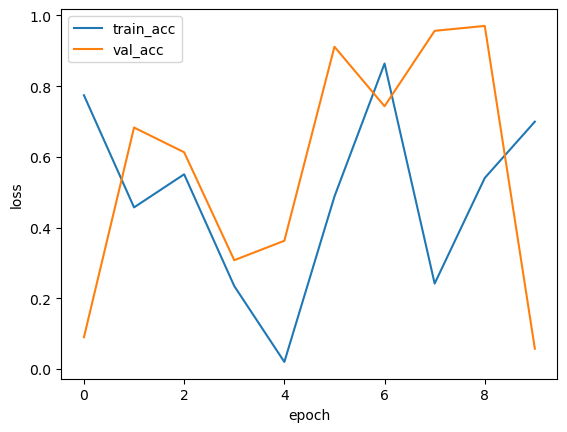

In [5]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_loss')
plt.plot(val_losses, label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('lossttt.png')
# 清空plot
plt.clf()
plt.plot(train_accs, label='train_acc')
plt.plot(val_accs, label='val_acc')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('accttt.png')

In [9]:
train_data_dir = '/Data4/gly_wkdir/coldgenepredict/raw_sec/S_italica/分好的数据集csv/二进制分批数据集/train/'
import pickle
with open(train_data_dir+'train_batch_'+str(1)+'.pkl', 'rb') as f:
    batch = pickle.load(f)
    sequence = batch[0].to(torch.float32).permute(0, 2, 1).unsqueeze(1).to(device)
    label = batch[1].to(torch.float32).to(device)
    # 查看标签的分布
    print(label.mean())




ModuleNotFoundError: No module named 'torch'

In [10]:
# ANSI 转义码定义颜色
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

# 使用颜色输出
print(f"{bcolors.OKBLUE}This is a blue text.{bcolors.ENDC}")
print(f"{bcolors.WARNING}This is a warning text.{bcolors.ENDC}")
print(f"{bcolors.FAIL}This is a fail text.{bcolors.ENDC}")


This is a blue text.
This is a warning text.
This is a fail text.


In [13]:
import torch
import torch.nn as nn

a = torch.tensor([[1,2,3], [2,1,0]])
net = nn.Embedding(num_embeddings=10, embedding_dim=5)  # 并未设置padding_index参数
print(net(a))

net = nn.Embedding(num_embeddings=10, embedding_dim=5, padding_idx=0)
print(net(a))

tensor([[[ 0.0998,  0.6486,  1.3596,  0.9276, -0.6701],
         [-0.7041,  1.6789,  0.9009, -0.0642,  0.6626],
         [ 1.9269, -0.9433,  2.1135, -0.8710,  0.7194]],

        [[-0.7041,  1.6789,  0.9009, -0.0642,  0.6626],
         [ 0.0998,  0.6486,  1.3596,  0.9276, -0.6701],
         [ 0.3562, -0.2997,  0.1108,  0.0980, -0.4070]]],
       grad_fn=<EmbeddingBackward0>)
tensor([[[ 0.0660, -0.5946, -0.8315, -0.9325,  0.0886],
         [ 1.1981,  1.7968, -0.6174, -1.0448,  0.1236],
         [-0.5655, -0.4027,  0.8215, -1.2259,  2.0235]],

        [[ 1.1981,  1.7968, -0.6174, -1.0448,  0.1236],
         [ 0.0660, -0.5946, -0.8315, -0.9325,  0.0886],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]],
       grad_fn=<EmbeddingBackward0>)


In [42]:
import torch
import torch.nn as nn

# 定义输入序列
sequences = [
    [1, 2, 3],        # 长度为3的序列
    [4, 5, 6, 7],     # 长度为4的序列
    [8, 9, 10, 11, 12]  # 长度为5的序列
]

# 求出最长序列的长度
max_length = max(len(seq) for seq in sequences)

# 填充所有序列到相同的长度
padded_sequences = [seq + [0] * (max_length - len(seq)) for seq in sequences]

# 转换成张量
tensor_sequences = torch.tensor(padded_sequences)

# 创建 Embedding 层
embedding = nn.Embedding(num_embeddings=13, embedding_dim=5, padding_idx=1)

# 获取嵌入表示
embeddings = embedding(tensor_sequences)

print(embeddings)


tensor([[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.6277,  0.7734, -0.2388,  1.5212,  0.1412],
         [ 1.3355,  1.2613, -1.3401,  0.4666,  0.0279],
         [ 0.2684,  1.1881,  1.0919, -1.4586, -1.0775],
         [ 0.2684,  1.1881,  1.0919, -1.4586, -1.0775],
         [ 0.2684,  1.1881,  1.0919, -1.4586, -1.0775]],

        [[-0.6562,  0.6157,  0.2941,  0.4966, -2.2336],
         [-0.2847,  0.3101,  0.5156,  1.1138, -1.1316],
         [-0.1117, -0.5562, -0.5425,  0.0519, -0.6485],
         [-0.3836, -0.3585,  0.1276,  1.0731,  0.9092],
         [ 0.2684,  1.1881,  1.0919, -1.4586, -1.0775],
         [ 0.2684,  1.1881,  1.0919, -1.4586, -1.0775]],

        [[ 1.5688, -0.1014, -1.4711,  0.2026,  1.5185],
         [ 0.5544,  0.2456, -0.6664,  0.0346,  0.7820],
         [ 0.1673,  0.3437,  0.1484,  0.7142, -0.1526],
         [ 1.8919,  1.6237,  1.1682,  1.3470, -1.0067],
         [ 0.4937, -0.6931,  0.8153, -0.4091,  1.2370],
         [ 0.2684,  1.1881,  1.0919, -1.4586

In [48]:
import torch
import torch.nn.functional as F

# 假设输入张量为 x，大小为 32x1x5x46386
x = torch.randn(2, 1, 5, 4)
x = torch.where(x > 0, torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))

print(x)
# 指定池化后的输出大小
output_size = (5, 2)  # 输出大小为 1x1

# 使用 adaptive_max_pool2d 进行自适应最大池化
pooled_tensor = F.adaptive_max_pool2d(x, output_size)

# 打印池化后的张量形状
print("池化后的张量形状:", pooled_tensor.shape)
print(pooled_tensor)

tensor([[[[1., 0., 1., 1.],
          [1., 1., 0., 1.],
          [0., 1., 0., 1.],
          [0., 0., 0., 0.],
          [0., 1., 1., 0.]]],


        [[[1., 0., 1., 1.],
          [0., 1., 1., 1.],
          [0., 0., 0., 1.],
          [1., 0., 0., 0.],
          [1., 1., 0., 1.]]]])
池化后的张量形状: torch.Size([2, 1, 5, 2])
tensor([[[[1., 1.],
          [1., 1.],
          [1., 1.],
          [0., 0.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.],
          [0., 1.],
          [1., 0.],
          [1., 1.]]]])


In [51]:
# 指定池化核的大小和步幅
kernel_size = (1, 2)  # 池化核大小为 1x5
stride = (1, 2)        # 步幅为 1x5

# 使用 max_pool2d 进行池化
pooled_tensor = F.max_pool2d(x, kernel_size=kernel_size, stride=stride)
# 打印池化后的张量形状
print("池化后的张量形状:", pooled_tensor.shape)
print(pooled_tensor)

池化后的张量形状: torch.Size([2, 1, 5, 2])
tensor([[[[1., 1.],
          [1., 1.],
          [1., 1.],
          [0., 0.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.],
          [0., 1.],
          [1., 0.],
          [1., 1.]]]])


In [81]:
train_data_dir = '/Data4/gly_wkdir/coldgenepredict/raw_sec/S_italica/分好的数据集csv/二进制分批数据集/train/'
import pickle, torch, random
with open(train_data_dir+'train_batch_'+str(1)+'.pkl', 'rb') as f:
    batch = pickle.load(f)
    # random.shuffle(batch)
    sequence = batch[0].to(torch.float32)
    label = batch[1].to(torch.float32)
    print(sequence.shape)
    size_0_sequence = sequence.size(0)
    size_0_label = label.size(0)

    # 生成相同的随机排列索引
    permuted_index = torch.randperm(size_0_sequence)

    # 使用相同的索引对两个张量进行重新排列
    permuted_sequence = sequence[permuted_index]
    permuted_label = label[permuted_index]

    # 查看标签的分布
    print(type(batch))
    print(len(batch))
    print(permuted_sequence.shape)
    print(permuted_label.shape)
    print(permuted_label)

torch.Size([32, 46398, 5])
<class 'list'>
2
torch.Size([32, 46398, 5])
torch.Size([32])
tensor([1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.])


In [85]:
import torch

# 创建示例张量
tensor_large = torch.randn(4, 2, 1)
tensor_small = torch.randn(4)
print(tensor_large)
print(tensor_small)
# 获取张量的大小
size_0_large = tensor_large.size(0)
size_0_small = tensor_small.size(0)

# 设置随机数种子
# torch.manual_seed(42)

# 生成相同的随机排列索引
permuted_index = torch.randperm(size_0_large)

# 使用相同的索引对两个张量进行重新排列
permuted_tensor_large = tensor_large[permuted_index]
permuted_tensor_small = tensor_small[permuted_index]

print(permuted_tensor_large)
print(permuted_tensor_small)


tensor([[[ 0.9020],
         [ 1.8761]],

        [[ 0.3737],
         [-0.0800]],

        [[-0.4059],
         [ 1.0705]],

        [[ 0.5663],
         [ 0.2678]]])
tensor([-0.2940,  0.5546, -1.0710,  0.9444])
tensor([[[-0.4059],
         [ 1.0705]],

        [[ 0.5663],
         [ 0.2678]],

        [[ 0.9020],
         [ 1.8761]],

        [[ 0.3737],
         [-0.0800]]])
tensor([-1.0710,  0.9444, -0.2940,  0.5546])


In [3]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

print(f"{bcolors.HEADER}This is a blue text.{bcolors.ENDC}")

This is a blue text.


In [22]:
import torch
import torch.nn as nn

# 输入数据
input_data = torch.randn(3, 5, 46)
# print(input_data)
# 将输入数据转换为二维张量，因为 Batch Normalization 期望的是一个 batch 数据
input_data = input_data.view(-1, 1)
print(input_data.shape)

# 批量归一化层，输入的特征维度为 3
batch_norm = nn.BatchNorm1d(690)

# 应用批量归一化
normalized_output = batch_norm(input_data)

print("归一化后的输出:", normalized_output)


torch.Size([690, 1])


RuntimeError: running_mean should contain 1 elements not 690

In [ ]:
from matplotlib import pyplot as plt 
#import numpy as np


dataName = open(dataPath,"r")
result = dataName.readlines()

arrX = []
arrY = []
for line in result:
    lineX = float(line.strip("\n").split("\t")[0])
    lineY = float(line.strip("\n").split("\t")[1])
    arrX.append(lineX)
    arrY.append(lineY)
    
plt.plot(arrX,arrY,c="b")
plt.axis('off') #不显示坐标轴及边框

plt.rcParams['figure.figsize'] = (6.0, 4.0) #设置figure_size尺寸
plt.rcParams['savefig.dpi'] = 100 #图片像素

plt.show() #在 plt.savefig 之前
plt.savefig('black.png',facecolor ="k") #设置背景为黑色


: 

In [4]:
# haha
import torch
import torch.nn as nn
layer_N = nn.LayerNorm(normalized_shape=[12, 1, 72], eps=1e-05, elementwise_affine=True)

t = torch.randn(3, 12, 1, 72)
t_t = layer_N(t)
print(t_t.shape)






torch.Size([3, 12, 1, 72])


In [1]:
import torch

# 定义两个tensor
tensor1 = torch.tensor([[0, 1],
                        [1, 0]])

tensor2 = torch.tensor([[1, 0],
                        [1, 0]])

# 比较两个tensor是否相等，得到一个布尔型的tensor
equal_tensor = tensor1 == tensor2

# 计算相同元素的数量
num_equal_elements = torch.sum(equal_tensor).item()

# 计算总元素的数量
total_elements = equal_tensor.numel()

# 计算相同率
similarity_percentage = (num_equal_elements / total_elements) * 100

print("相同元素的数量:", num_equal_elements)
print("总元素的数量:", total_elements)
print("相同率:", similarity_percentage, "%")

相同元素的数量: 2
总元素的数量: 4
相同率: 50.0 %


In [4]:
import torch

# 定义神经网络输出的结果和真实标签
tensor1 = torch.tensor([[0, 1],
                        [1, 0]])
tensor2 = torch.tensor([[1, 0],
                        [1, 0]])

# 比较预测值和真实值，计算准确率
total = tensor1.numel()  # 总数量
correct = (tensor1 == tensor2).sum().item()  # 相同预测值和真实值的数量
accuracy = correct / total  # 准确率

print("准确率：", accuracy)
print(correct)
print(total)


准确率： 0.5
2
4


In [3]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.device_count())
# 输出可见GPU的名称
print(torch.cuda.get_device_name(0))
# 输出cuda:2对应GPU的名称
print(torch.cuda.get_device_name(2))

2.1.1+cu121
True
3
NVIDIA RTX A6000
NVIDIA GeForce RTX 3090


In [3]:
import torch 

# 创建一个张量
shape = [32,4634,5]
t = torch.ones(shape)
print(t.shape)
a = t.shape[0]
print(a)
print(type(a))


torch.Size([32, 4634, 5])
32
<class 'int'>


In [2]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [4]:
for e in range(0):
    print(e)

0


In [10]:
import tqdm, time
for e in tqdm.tqdm(range(10)):
    # print(e)
    time.sleep(1)

100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


In [9]:
# 获取当前时间yy:mm:dd:hh:mm:ss
import time
print(str(time.strftime("%Y-%m-%d-%H:%M:%S", time.localtime())))

2024-05-15-23:43:06


In [16]:
import torch
a = torch.randn([3,5,5])
print(a)
import torch.nn as nn
batch_norm1 = nn.BatchNorm1d(5)
print(batch_norm1(a))
print(a.mean(dim=1))
print(batch_norm1(a).mean())

tensor([[[-0.6078, -1.9689,  2.9219, -0.7258, -0.6083],
         [ 0.5614,  0.9803, -0.5313, -2.0395,  0.8974],
         [-0.3832,  0.7642, -0.3712,  1.1476, -0.9181],
         [-0.6455,  0.1229, -0.0568,  0.2947, -0.0849],
         [-0.0528,  1.1971, -0.6759, -1.3760, -1.4606]],

        [[-0.3206, -1.0888,  0.4327,  1.2018, -0.8583],
         [-0.6180, -0.7792,  0.9368,  0.2814,  0.0360],
         [ 0.4320,  1.4195, -0.1430,  0.2279, -1.0816],
         [-0.4013,  0.0612,  0.1625, -0.6073, -0.1219],
         [-1.0133, -0.8650,  1.1110,  0.8135, -1.4759]],

        [[ 0.3332,  1.4323, -0.6665,  0.0580, -0.4765],
         [-0.5036, -0.8490, -0.7179, -1.0895,  0.1538],
         [-0.6970,  1.3743, -1.1301,  0.0735,  1.1462],
         [-0.3967,  1.2532,  0.1282,  1.2311,  1.5014],
         [ 0.6486, -0.0119, -0.1383, -0.5730,  0.2313]]])
tensor([[[-4.7063e-01, -1.6461e+00,  2.5774e+00, -5.7255e-01, -4.7107e-01],
         [ 9.3448e-01,  1.4363e+00, -3.7437e-01, -2.1811e+00,  1.3370e+00],
  

In [3]:
import pandas as pd

csv1 = pd.read_csv("/Data4/gly_wkdir/coldgenepredict/raw_sec/S_italica/分好的数据集csv/new/train_data.csv", header=None)
csv2 = pd.read_csv("/Data4/gly_wkdir/coldgenepredict/raw_sec/S_italica/分好的数据集csv/new/val_data.csv", header=None)
# # 输出表头
# print(csv1.columns)
# print(csv2.columns)
# 统计第三列的数据情况
print(csv1[2].value_counts())
print(csv2[2].value_counts())



2
0    2824
1    2064
Name: count, dtype: int64
2
0    707
1    516
Name: count, dtype: int64


In [1]:
import random
a = random.random()
a

0.9258820632003453

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, global_mean_pool
import numpy as np
from sklearn.metrics import accuracy_score


In [2]:
class SequenceModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SequenceModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [3]:
class GraphModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
    
    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = global_mean_pool(x, batch)
        return x


In [4]:
class CombinedModel(nn.Module):
    def __init__(self, seq_input_dim, seq_hidden_dim, seq_output_dim, graph_input_dim, graph_hidden_dim, graph_output_dim, final_output_dim):
        super(CombinedModel, self).__init__()
        self.sequence_model = SequenceModel(seq_input_dim, seq_hidden_dim, seq_output_dim)
        self.graph_model = GraphModel(graph_input_dim, graph_hidden_dim, graph_output_dim)
        self.fc1 = nn.Linear(seq_output_dim + graph_output_dim, final_output_dim)
    
    def forward(self, sequence_data, graph_data):
        seq_out = self.sequence_model(sequence_data)
        graph_out = self.graph_model(graph_data.x, graph_data.edge_index, graph_data.batch)
        combined = torch.cat([seq_out, graph_out], dim=1)
        out = self.fc1(combined)
        return out


In [6]:
train_data_dir = f'/Data4/gly_wkdir/coldgenepredict/raw_sec/S_italica/分好的数据集csv/new/二进制一位分批数据集/train/'
val_data_dir = f'/Data4/gly_wkdir/coldgenepredict/raw_sec/S_italica/分好的数据集csv/new/二进制一位分批数据集/val/'
train_graph_dir = f'/Data4/gly_wkdir/coldgenepredict/raw_sec/S_italica/分好的数据集csv/new/二进制一位分批数据集/Data/32/train/'
val_graph_dir = f'/Data4/gly_wkdir/coldgenepredict/raw_sec/S_italica/分好的数据集csv/new/二进制一位分批数据集/Data/32/val/'
def get_graph_data(index, train_val):
    if train_val == 'train_batch':
        with open(train_graph_dir+train_val+'_'+str(index)+'.pkl', 'rb') as f:
            data = pickle.load(f)
    elif train_val == 'val_batch':
        with open(val_graph_dir+train_val+'_'+str(index)+'.pkl', 'rb') as f:
            data = pickle.load(f)
    else: # raise报错
        raise Exception(f'get_graph_data函数参数错误{index}和{train_val}')
    return data

In [7]:
import time
TheTime = str(time.strftime("%Y-%m-%d-%H:%M:%S", time.localtime()))
print(TheTime)
# 设置随机种子
# seed = 3407 # https://link.zhihu.com/?target=https%3A//arxiv.org/pdf/2109.08203.pdf
# torch.manual_seed(seed)
# =============================================
# 此次训练的目的是什么？
Thetarget = '新模新分'
# =============================================
# 参数定义
torch.cuda.set_device(0)
device = torch.device("cuda:0")
cpu = torch.device("cpu")
# 学习率和L2正则化参数
lr=0.0001
weight_decay=1e-4
epochs = 200

# 定义一个最好的精度，val最好精度的模型被保存，没0.8你就别存了
best_acc = 0.8
databasename = '二进制一位分批数据集'
# 保存图片的名字
root_dir = '/Data4/gly_wkdir/coldgenepredict/raw_sec/S_italica/CNN_GCN/'
loss_png = root_dir + f'loss64-{lr}-{weight_decay}-{epochs}-{databasename}-正常数据集{TheTime}-{Thetarget}.png'
acc_png = root_dir + f'acc64-{lr}-{weight_decay}-{epochs}-{databasename}-正常数据集{TheTime}-{Thetarget}.png'
# 给一个二进制数据集路径

2024-05-18-23:08:02


In [ ]:
# 假设我们已经有了序列数据、图数据和标签
# sequences: [64, 46398] 的序列数据
# labels: [64, 1] 的标签数据
# edge_index: [2, num_edges] 的图边数据

for epoch in range(epochs):
    model.train()
    model = model.to(device)
    epoch_loss = 0
    right_num = 0
    num1s = 0
    num0s = 0
    # 用于合并sequence和label的list
    sequence_list = []
    label_list = []

    for i in range(129):
        with open(train_data_dir+'train_batch_'+str(i)+'.pkl', 'rb') as f:
            optimizer.zero_grad()
            batch = pickle.load(f)
            sequence = batch[0].to(torch.float32)
            label = batch[1].to(torch.float32)

            # print('sequence: ', sequence.shape) # torch.Size([64, 46398, 1])
            # print('label: ', label.shape) # torch.Size([64])
            sequence = sequence.squeeze(2) # torch.Size([64, 46398])
            label = label.unsqueeze(1) # torch.Size([64, 1])
            num1s += (label == 1).sum().item()
            num0s += (label == 0).sum().item()
            
            # print('sequence: ', sequence.shape)
            # print('label: ', label.shape)
            size_0_sequence = sequence.size(0)
            # size_0_label = label.size(0)

            # 生成相同的随机排列索引
            permuted_index = torch.randperm(size_0_sequence)
            # print('train_permuted_index: ', permuted_index)
            # 使用相同的索引对两个张量进行重新排列
            permuted_sequence = sequence[permuted_index]
            permuted_label = label[permuted_index]

            # --------------------------------------------------------------------------------------
            data = get_graph_data(i, 'train_batch').to(device) # type: ignore
            # --------------------------------------------------------------------------------------
            permuted_sequence = permuted_sequence.to(device)
            permuted_label = permuted_label.to(device)
            outputs = model(data, permuted_sequence)
            # print('outputs: ', outputs.shape)
            # print('realoutputs', outputs)
            loss = criterion(outputs, permuted_label)
            epoch_loss += loss.item()

            # outputs = torch.where(outputs > 0, torch.tensor(torch.float32(1)).to(device), torch.tensor(torch.float32(0)).to(device))
            outputs10 = torch.where(outputs >= 0.5, torch.tensor(1.0, dtype=torch.float32).to(device), torch.tensor(0.0, dtype=torch.float32).to(device))

            right_num += (outputs10 == permuted_label).sum().item()

            loss.backward()
            optimizer.step()
            scheduler.step() 
            
    
    print('标签里1的个数：', num1s)
    print('标签里0的个数：', num0s)
    _all = num1s + num0s
    print('训练集总数：', _all)
    print('正确的个数：', right_num)
    accuracy = right_num / _all
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')
    print(f'Train Accuracy: {bcolors.FAIL}{accuracy:.4f}{bcolors.ENDC}')
    train_losses.append(epoch_loss)
    train_accs.append(accuracy)
    print('最后一个批次的输出，不满batchsize是正常的:\n',outputs)

    model.eval()
    val_loss = 0
    right_num = 0
    num1s = 0
    num0s = 0
    for i in range(92):
        with open(val_data_dir+'val_batch_'+str(i)+'.pkl', 'rb') as f:
            batch = pickle.load(f)
            valsequence = batch[0].to(torch.float32)
            label = batch[1].to(torch.float32)

            size_0_sequence = valsequence.size(0)
            # size_0_label = label.size(0)

            # 生成相同的随机排列索引
            permuted_index = torch.randperm(size_0_sequence)
            # print('eval_permuted_index: ', permuted_index)
            # 使用相同的索引对两个张量进行重新排列
            permuted_sequence = valsequence[permuted_index]
            permuted_label = label[permuted_index]
            permuted_sequence = permuted_sequence.squeeze(2) # torch.Size([64, 46398])
            permuted_label = permuted_label.unsqueeze(1) # torch.Size([64, 1])
            # --------------------------------------------------------------------------------------
            data = get_graph_data(i, 'val_batch').to(device) # type: ignore
            # --------------------------------------------------------------------------------------
            permuted_sequence = permuted_sequence.to(device)
            permuted_label = permuted_label.to(device)
            outputs = model(data, permuted_sequence)
            loss = criterion(outputs, permuted_label)
            val_loss += loss.item()

            # outputs = torch.where(outputs > 0, torch.tensor(torch.float32(1)).to(device), torch.tensor(torch.float32(0)).to(device))
            outputs = torch.where(outputs >= 0.5, torch.tensor(1.0, dtype=torch.float32).to(device), torch.tensor(0.0, dtype=torch.float32).to(device))
            # 计算标签为1的个数
            num1s += (permuted_label == 1).sum().item()
            num0s += (permuted_label == 0).sum().item()
            right_num += (outputs == permuted_label).sum().item()

    print('标签里1的个数：', num1s)
    print('标签里0的个数：', num0s)
    _all = num1s + num0s
    print('训练集总数：', _all)
    print('正确的个数：', right_num)
    print(f'Validation Loss: {loss.item():.4f}')
    accuracy = right_num / _all
    print(f"Validation Accuracy: {bcolors.OKGREEN}{accuracy:.4f}{bcolors.ENDC}")
    val_losses.append(val_loss)
    val_accs.append(accuracy)


In [12]:
a = {}
a['a'] = 'a'

if a.get('b'):
    raise TypeError('duplicate gene ID')
print(len('GGCATGGCATTCCTCGTGCCCTGTCTGTTGTGAACAGAAATAAATTTGTAATGTCATAGATCTTGAGCTCGACTTCAGTTGCCTGAGCCAATGGCCACATCCTAAAAGAAGGAAATCGAGCTAATAATGGGCAACTTGGCAAGCAGAAGCAGCAGAGCAACTTTTCCATCGCTGGGCTGCTTCTTCCTGCTTGCAACGTGGCCGCTGTTTCTGCGGCACACCCCGCCGGCCCTCCCTGACCCTCTGGCGATGTGGCCCCTCTCCCCGTGTGCGCGCTTGCAGTCTTGTGGTTCCCAAGCGCAGAGCAGTTCGTGGAGCCAGGTGGCCTGCAGCCCACACCACGCATCGCGTAGTTGGCTCGCGGGACCCAGGCGTCAGCATCGCGCCTCCCTCTCCCGAAGCTCGCGTCTCGGCGTCTGTCTCCTCGCACCTCGGCGCCCGGACCCGGAGCGAGCCTGAGGCGCGCGACAAAGCGATGGCCTCGCCGGCGGCGGTGACGCGGCACCCTTCCCCCACCGTCCTTGCCTCCGGCCCTCGCTACTGCCGCCGCGTGAGTGCTCCCCCTCTCCCGCTCCCCCGGTGTAGTCTGCGGATGTAACACTGTGATTCCACTGGTGGAATCCACGCCCAGCGGTGCGGTTAGTGAGCTCCTGAGAACCGTAGGGTTTCAACGCCGCACCTCGTTCCGAAGCTGCCATATTATTCTTAATTCTTCTAGGAGGGAATGAGCGGTGCGAGTTTTTAGGGGAACCCGTTTAGCCATGGATTATTCTGATTGACACGAAACAGTACAGTTGAGTACTTGAGTGAGTGTGTTAGATTTGGAAGCAGGAGGCTGATGTGCACAATTGTTTGGATGATCGTTTTGTACTGAAGGGCCGGATTGATGGTTTGGACTGTCATTATATATATGCCACACGCAGAAATCATGATTTCCTCGTATAATATATACTGATTTAGGTATTGTTAGATAATGGTATGGCCCATAGGCCATATTGATGGTTTGTTCGAGTGCTTCATTAAGCAGGAGAGAAATGGATATATTGCACACTACAAGTTGCTTGTCTGAGTCTTGTGCACATGTAACATTGAACGCCGCAAACTGCCTGGGCTGTTCCAGAATAAGTTTGGTCTGAAGTGGCCATATGGTTTACACCCATTCTGGCATCTGTTTAGTTTCCTTTGTTTACCTATATTCTGTTCTGTATAATGTTTGTTCATCCCGCTACAGAATTTTGTTCCCAAAACTAAGTTTGTTCACTCTGGCAACGATCATTTGCAGGGACATCCACCCTCAAAAGTTGGCTTCCGAAGCTTGGCGCCACGGCTAAAGGTCAATGCACTTTTTGGGTGGCCTAAGGGAGACACGTCAACACGTCAACTGATCCCTCCTGCTGCTGAATCATATACGCTCTCAGGGTCAGCCTTAGAGGTGTTTTGTGTTTCTTGAGTGAACTCCTTTTCCAGGACTTATGCACCTAATTCATGATTTCCTTAATCGCTCGTTCGTTTCAGGTGGGTGCAAAACCACGTGAGGTGTCTATTTCTGTTGCTTCTTCTATCATGGACATTCCTGCTGCGGATTGGGATGCCTGTGCGTGTGATCCAGATGATCCTGAAAACTTTAACCCTTTCCTTACTTATGCATTCCTCTCAAGCTTAGAAGAATCACATTCTGCAGTAAAGGTAAGCACATAAATCACCATGTATCCTCGTCAGATCATACAAAGACATTTCTGTTTTAATCACTGTTCACCTACTGCATACACAGACGTTTAGCCCGTTTGACCGTTTAATTGGTTGTTTACACCAAATAATGGCTAAATGATAGGTGACCGACTGTATAACATTTAGCGTTTAGGTGAACACTAGTTTTAACCGTTAAGTGCTCAAGCTCCATTATAAGCATGTGTAATGTCTTACACATTGATTTTGACGATAAATTTGCTGTGTTTAATTGACAACAGAACTACAAACAAGATTTGTCTGCAATACCACCAGGCATATTGAGACATCAAAAATGATGAATTACCTATGACCAGGGGGTGTTCTGTGTGCTTAGCCTGACCCATCATGATTGTGATTCTATTTCTTTTGCGATTCTTAATTGCACAATTGCTTTCTTTATGAAAATTACTCCCGTAGATTGAACAAAGATTAGCTCTAACTTTTATTCAGTACCAACATGCATGGATGTACACACTGTTATCTTATTGTCTTCCTTGAGACCTTGGTCTCAACTGATTTCAGGAAACTGGCTGGTTACCTTTCCATGTTGTTGCACGGGATGAGAATGGACATATTATAGGTGTTGTTCCGCTTTACCTTAAAAGGTTTAACATCATTAACAGAATATCATCTCCTGTCTTCCTACTTGCTATGTACTATGTGCTCCTTTCATCTTGTTCATTGGTTGAGTGACAACATTGTGAACTTGCAGTCATTCTAGAGGAGAGTTTGTGTTTGATCAATCATGGGCAGAAGCTTACTACAACTATGGCCTTGAATACTATCCAAAGCTCCAGTCCTGTGTGCCTTTTACTCCAGTAACTGGTCAAAGAATATTACTTCGAAATACATCATATCGTGATCAAGTTTTTGATGCACTTGTCAAAGGTTTGATGAGCCTGACTACCAAGGTATCTGGATTAGCGTTCTTGCAAATATTTGTTTAAGTGGTGACTACTAAGAATGCCTAAAAATTATTATATCAAAATCATCCTATATTTTTAGCATCTATGTGCTACTGTTCATTGTTTCCACTTTCCACCTTTTATCAGCTCTACTTCATATGGCATTGTGATATCCTCTAGGACTAACCATTGCTTAATTCTTGAGTCATTTGTCTTCTTTTATTCTTGTTTTCTTGACATTTACAGTGTATACCAAAGGGCACCAAGTCTGTTTCATTTAAATAGAAGAGTTTGGTTGTCTGCTTGCAGCTACAAAGTTGCTAAATCAGGGCTTGATCGTTAATGTGTGTCGGTAATGAGTCAATGCTTTTTTTCCTCGAAAAATGCAGGAGAGCTGCGCATCATTATATTAAGAAGTGAAAAAAAGGGAAAGAACCCATACAACACGCCCCAGGCCAGCCAAAAGGCAAGCCCACACACTCACACCAACTCACGCCAACTCACACAAAACTCCCCCAAACTCTCTGATCCTTAGGCGTCCGTTTCAAAGGGCGACCAACTAATGAGTCAATGCTGAAGTAATAAAAGTTTAAAATCCTGTCTCTCTTCACAACTCATGTTTCATTATCTTTATGGTGTTAACTTGTAACACCCCAAAGTCCAAACAGCTCAGATTCACTCTGAGCGCTCACACTCTCACCAACCCACTTAACCTAGGGTTAACCCGGGGTTTGGTGGGCCTAAAACCCCTACAAACTTGCATCAACACACACATGGGCCACCATGGGCCTAATTCAAACTGGGCCGATGTCACATTACTAATTATTGATGTAGGCTCATGTATATGTGAAGTAGTGACAACCTTTTTGGGTTGCTTTGTTTATTTATCAACTACCTCTGTGTAGCTCTTATAAGACTACCCTCAGATGTATTGAACCAAGTTAATATCTGTCGGTTTCTGCTGCATTTCAGATGAACGTGTCATCATTACATATTACTTTTCCGTCTGAAGGTGAATTCAGCAAATTGAAGAATAGTGGGTTGTTACAAAGAATTGGGTTGCAATATCACTGGAGAAATCGGAATTACAAGAGGTGCTAACGCATTATGATATTAATAGCATTTCCTTCTGGATGGTTCAATGCTTGAAGTTGGGACTTCTACGTTCTAACCATATTATACTGCAACTTGGGGTTTCAATACTTGGTTGGAACATCTAGTTTTAAGAAAATCTTGGTGGACTAGAAGTGCAAACAAGCTCACAGTTTGGATGCAGCTACTATTTCCCTCATATACTGTTAATTCAAGGCATTTTTCTGTTCTTTTCCCACAACATCTCATTTTTGTTAAAAAATATGACACTTGGTTGTTGTATACTCTCTATCATTTGCTGTAGTAATTTATTTGTTAATCGTTGTGAATCAGCTTGTTATAGCATTCTAGTTAGACTTTCTCTGTGGGACATGAGGTCTTATACCTATTTTGGCTAACTTCTTCCTTTATTAGTGCCAAAAAAGTAGTTATCTTGACCAGATAATTGTAGCTAAGAGGACACATTTCAGATAAAAGCATAGCATGTGGACCATCGTTTTAAAGCAGTGTTTTTTTATGGAATCACTGCCTTGTTGACTCTGTGCTAAACTTTGCGAGATTACATTTTAGTTGCCTAGTTTATTGTGATTTCTCAATGTTTGCTGATATTCATTGCTCACCATGTTTTTTCAGTTTTGATGAGTTTCTGATGGATTTGAAGCAACCTAAACGGAAGAATATCAGACAAGAACGTAAAAAGGTTTACCTTCTTTTGGCTTAATTGATTCAAATGTGCTTGTCAATTGAGGATAATCTTTTTTGGAAACTTCCCAGATTCCTGCTCAAAATTTGCAAATGAAGCGACTTCGTGGAGACGAAATAAAGGTAATTATAAGGGAGAGATAGTTCTTTAATCGTACTCTTCAGTCACTTCTTTTACATTATCATATTCTTCACAGTATCTCATTAGCTTTGTTGCTTTCTGGACAGCTTACTTATAATTGTTTCCATTCACATTGCAGAGCAGCCACTGGGATGCCTTCTATAAATTCTACCGTAACACAACTGATAATCAGTTTGGTTTCACATTCTTCTTAACTTGTATTTTTTTTATTCTATACCTAACATCATGTTCTTGAAATGGTTGTTCATCTTCTGTCAGCATTCATACATATCGCGATGCCGCACCATTCTTGTTGACTCACTCTTCAACTTGAATTCCGGTGTCCATTTCTTCTTATTTACAATGTCACATAGTTTCACCTAGGTTGATCTATTTTTTTATCTGCACCCTTTGTAAACATGTATGATTTTTTTTAAAGGATTAATATTTAAGTGTGCTACTGTGTATTGAGAACTGAAGTTAATCAAAGCAAGGAAGGAATAGAAGTTTAGCAAATTATCAGGCAAAAAGGTCATTTAATCGAGCTAAATGGCCACTTAAACAGATACATTTGGCCATTGTGTAGTGTTTAAACAGGCTAAATTGCCATTTAGGAAAAAAAGGATTGGAGTTTGAACTTTGAAGTAATTACTGATAAATGCATGTGACTGCTAGCACATTGCCTTCTACTTGAACTGAAAGAGGCAACAAAGTTTTAAGAACCATCACCGCGTGAGTGCGTGACCCCCTCACCTTTTTGCACTTTCTTTTTGTTACACGGCATATCTGTAGGTATTTGTGGTGACCATGCCTAGGCACGTTTTTCATTAACAGGGGCATATATGTAGGTATGAATTAAGATTGTATAGAATTCGCTAGTGCAGTAATGTAGGTTTCTGTATTTTCACTTGTAGCTAGGGAAGTAGGGATGCTTCCATAGGTCTTTTCTGTCCCATGTCCTCTGTTTTTGAAATCCGAATCTGTTAATTAAATGAGTTCTGTGGCGACCCAGTGATCCAGAGAAAGCAAAACTTGCATCCCTACTCATAGCTTACTTTTCACTGCAGTTGGGGCCGACCATACTTGACAAGGGATTTCTTTCACCTCTTGGGCGAAAAGATGGGGGAGAATGTGATGCTTATTGTTGCTGAAAAAGATGATAAACTAGTTGCTGGAGCTCTTAACCTTATTGGAGGTGATACACTGTTTGGCCGGTTATGGGGATGCCTGCCAGATGCTTACTTTCCCAATTTGCATTTTGAAGCTTGCTATTATCAGGTAATTTGCTCATGTTTAGAACCATATCTTTGGAACAATGCAATAATATGGTTTGTTTATAGAATTTGATATTGTCCAGGCGATTGAAGCAGCCATAGAGTTAAACCTGAGTAATGTGGAGGCAGGTGCTCAGGGAGAGCACAAGATCCAGCGTGGTTACCTCCCAGTGACAACTTACAGCTGCCACTACTTTTCAAATCCTGGTTTTGCGGCAGCTATTGGAAATTTTCTTACACATGAGACGGCTCAGGTATTTTCGTGTTGATATTTTGAACCAGTTTCTTGCCAAAACTATGTGATATCAACCTTGCTGTCTTTGTTCTACTCACTTCTGTGTGCTGAAAATAATCTTTTGTGGACACATATACAACTCTTTCATCTGAGTGCATAGTATCTGTAGTTAATCAGTGCCATCCACATCCAATGCCAAACTCACCTCCTAGATTGAGCACCACATCTGGAACCCTTACATCTGAAGCTTGTCATGTTTTGGTTTCAATATTTTCCACTAGATTAGCCTCACATTCTGATGGGCTGATTGGGTGCTCTAGTGGACGGCATCATCACCAATAGTTGATATACTCACACAAAAAAGAAATTATTACCTCAGCAATACCACTTTTTGGAGCTAATGCGATTCTATGTTAGCCAGTGCTGAGTGTGACTAAGATCAGGACATCTTAGTAAACATGCATTGACTTTAGCAGTACTTTGTTGATACCATATATTAACGCATAAGGCATGATATCTTATTTCACCTTTTTCTAGCTTATTGTTGAGAAATTCTATTTTTCCTCCCGGTGGTAACTGCTGACACTACCAGTGTGGCGTTTATTTTATGTCAGACACTTATTTTCTTAAAATCCTTAGGGAAATGCAGTTTATTATGATGGACAGTTTGCATACCTTTCTGCCTTTTCCTGAAACTCCCAACTAATATTCTTGGTGTTAATAATACCAGGTTAAGCGTGCTATTAAGGTCCTTCATGATTCGGGTCCATACAAGGAAGACATACTGAAAGAATTTGCAGCTCAACAAGGCATCGACCTGTAGAACACAGAAGGAGCTAACACTTTGCATACTGTTTTATAGGATTAGCATCTTTTATGTAGCAACAGGAATACGGGTAATCCCATCAACTATACCAAATTACGGATCCGACATTTGTACACTGCTAGGAATGTAAATATTCAACATGTAAATCTAAAACCATTGGCTCCAATGGTCAACATCTAAACCCAAACATTCTGCGATACTATGCATCTCTGCGTCAGAATTCAGAAATGCTTTCTGGGCGCTATTACCTCAGCCTTAAATAAACCTAGCCGTCAAGTTGGGAGCTATAGCTATACTTGTTTCTACTTTTCCCAACAGAAGGATCTGATGCTTCATGTATATTGCGCTCTTTTCTAATGGGATCTCTGATGCTTCATGT'))

7262


In [23]:
import torch

def reshape_it(input_tensor: torch.Tensor, n=215) -> torch.Tensor:
    # 获取第一个维度的大小
    batch_size = input_tensor.shape[0]
    
    # 计算每个样本所需的元素数
    required_elements_per_sample = n * n
    
    # 将输入张量展平，并计算每个样本的元素数
    flat_tensor = input_tensor.view(batch_size, -1)
    num_elements = flat_tensor.size(1)
    
    # 如果当前样本元素数不足，进行填充
    if num_elements < required_elements_per_sample:
        # 计算填充元素的数量
        padding_elements = required_elements_per_sample - num_elements
        # 对所有样本进行填充
        padded_tensor = torch.cat((flat_tensor, torch.zeros(batch_size, padding_elements, device=input_tensor.device)), dim=1)
    else:
        # 如果元素数足够或过多，进行截断
        padded_tensor = flat_tensor[:, :required_elements_per_sample]
    
    # 将调整后的张量重新调整为 (batch_size, n, n) 的形状
    reshaped_tensor = padded_tensor.view(batch_size, n, n)
    
    # 扩展维度并重复3次，形成 (batch_size, 3, n, n)
    reshaped_tensor = reshaped_tensor.unsqueeze(1).expand(-1, 3, -1, -1)
    
    return reshaped_tensor


In [27]:
import torch

a = torch.randn(32, 1, 46398)
print(a.shape)
a = reshape_it(a)
print(a.shape)



torch.Size([32, 1, 46398])
torch.Size([32, 3, 215, 215])


In [42]:
def mutate_tensor(input_tensor: torch.Tensor, mutation_rate=0.5) -> torch.Tensor:
    # 获取张量的形状
    num_samples, num_features = input_tensor.shape
    
    # 计算需要置零的位置数量
    num_mutations = int(num_features * mutation_rate)
    
    # 生成随机位置
    mutation_indices = torch.rand(num_samples, num_features) < mutation_rate
    print(mutation_indices)
    # 创建一个掩码
    mask = ~mutation_indices
    
    # 使用掩码将选定位置的值变为0
    mutated_tensor = input_tensor * mask
    
    return mutated_tensor

import torch

a = torch.randn(3, 4)
print(a.shape)
print(a)
a = mutate_tensor(a)
print(a.shape)
print(a)



torch.Size([3, 4])
tensor([[ 2.0702,  0.0406,  1.1342,  0.0933],
        [ 0.7887, -1.5404,  0.3875, -0.9056],
        [ 0.0022, -1.8251,  1.3807,  1.8410]])
tensor([[ True,  True,  True, False],
        [False,  True,  True,  True],
        [False, False,  True, False]])
torch.Size([3, 4])
tensor([[ 0.0000,  0.0000,  0.0000,  0.0933],
        [ 0.7887, -0.0000,  0.0000, -0.0000],
        [ 0.0022, -1.8251,  0.0000,  1.8410]])


In [21]:
import torch
a = torch.rand(1, 5)
print(a)
a = a < 0.2
print(a)

tensor([[0.2350, 0.8241, 0.7370, 0.2785, 0.8987]])
tensor([[False, False, False, False, False]])


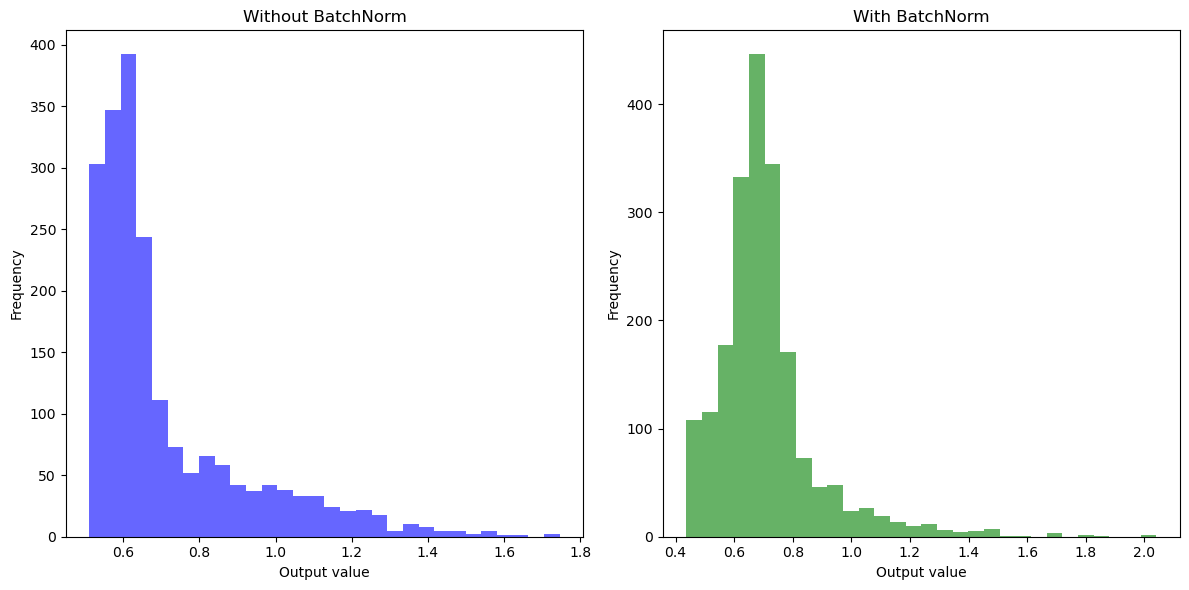

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 生成不均匀分布的数据
data = torch.cat([torch.randn(1000, 1) * 0.5 + 2, torch.randn(1000, 1) * 5 - 2], dim=0)

# 定义没有BN层的简单网络
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 定义有BN层的简单网络
class SimpleNetWithBN(nn.Module):
    def __init__(self):
        super(SimpleNetWithBN, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.bn1 = nn.BatchNorm1d(10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.fc2(x)
        return x

# 初始化网络
net = SimpleNet()
net_bn = SimpleNetWithBN()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer_bn = optim.SGD(net_bn.parameters(), lr=0.01)

# 定义目标
target = torch.ones_like(data)

# 训练网络
def train(net, optimizer, data, target):
    net.train()
    optimizer.zero_grad()
    output = net(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    return output

# 训练若干轮次
outputs_no_bn = []
outputs_bn = []
for epoch in range(20):
    output_no_bn = train(net, optimizer, data, target)
    output_bn = train(net_bn, optimizer_bn, data, target)
    outputs_no_bn.append(output_no_bn.detach().numpy())
    outputs_bn.append(output_bn.detach().numpy())

# 可视化结果
plt.figure(figsize=(12, 6))

# 没有BN层的网络输出分布
plt.subplot(1, 2, 1)
plt.hist(outputs_no_bn[-1], bins=30, alpha=0.6, color='blue')
plt.title('Without BatchNorm')
plt.xlabel('Output value')
plt.ylabel('Frequency')

# 有BN层的网络输出分布
plt.subplot(1, 2, 2)
plt.hist(outputs_bn[-1], bins=30, alpha=0.6, color='green')
plt.title('With BatchNorm')
plt.xlabel('Output value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [27]:
class bcolors:
    # Regular colors
    PURPLE = '\033[95m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    WHITE = '\033[97m'
    BLACK = '\033[90m'
    CYAN = '\033[96m'
    
    # Bright colors
    BRIGHT_BLUE = '\033[94;1m'
    BRIGHT_GREEN = '\033[92;1m'
    BRIGHT_YELLOW = '\033[93;1m'
    BRIGHT_RED = '\033[91;1m'
    BRIGHT_WHITE = '\033[97;1m'
    BRIGHT_BLACK = '\033[90;1m'
    BRIGHT_CYAN = '\033[96;1m'
    
    # Background colors
    BG_BLUE = '\033[44m'
    BG_GREEN = '\033[42m'
    BG_YELLOW = '\033[43m'
    BG_RED = '\033[41m'
    BG_WHITE = '\033[47m'
    BG_BLACK = '\033[40m'
    BG_CYAN = '\033[46m'
    BG_PURPLE = '\033[45m'
    
    # Additional text styles
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    REVERSED = '\033[7m'
    RESET = '\033[0m'
    
    # Combine styles
    BOLD_BLUE = '\033[4;94m'
    UNDERLINE_GREEN = '\033[4;92m'
    BOLD_UNDERLINE_RED = '\033[1;4;91m'

# 示例使用
print(f"{bcolors.CYAN}This is red text{bcolors.RESET}")
print(f"{bcolors.BOLD_BLUE}This is bold blue text{bcolors.RESET}")
print(f"{bcolors.BG_GREEN}{bcolors.BLACK}This is black text on green background{bcolors.RESET}")


This is red text
This is bold blue text
This is black text on green background


In [30]:
print('\033[4;34m' + '下划线蓝色文本' + '\033[0m')


a下划线蓝色文本


In [7]:
0.1+0.2


0.30000000000000004